In [1]:
##Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import matplotlib.ticker as ticker
import datetime


In [96]:
## Read in data from Excel and display the first five rows. Set the column 'Time' to be formatted as date/time

weather_data = pd.read_excel(r"C:\Ben\Ben\Teaching\python\Hegreneset_weather_data.xlsx")
weather_data['Time'] = pd.to_datetime(weather_data["Time"])

weather_data.head(5)

,Time,Temperature(℃),Feels Like(℃),Dew Point(℃),Humidity(%),Precipitation (mm),Wind Speed(m/s),Wind Gust(m/s),Wind Direction(º),Indoor Temperature(℃)
0,2020-03-22 00:00:00,4.1,2.3,0.8,79,0.0,1.5,4.6,115,21.8
1,2020-03-22 00:30:00,4.1,1.6,0.7,79,0.0,2.8,6.1,132,21.9
2,2020-03-22 01:00:00,4.0,1.8,0.2,76,0.0,3.0,4.6,171,21.9
3,2020-03-22 01:30:00,3.9,1.5,0.0,76,0.0,2.7,5.1,157,22.0
4,2020-03-22 02:00:00,3.8,1.5,-0.1,76,0.0,2.9,5.1,168,22.1


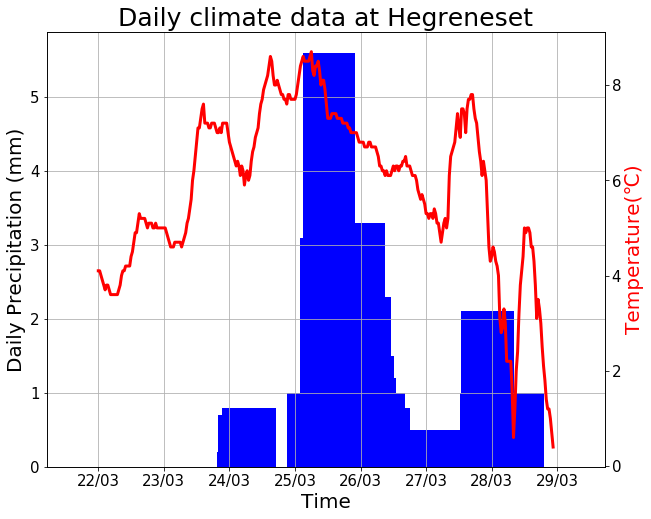

In [128]:
#Create a blank figure containing one plot with a figure size of 10 by 8 cm. 
figure, ax1 = plt.subplots(figsize = (10,8))
ax2 = ax1.twinx()

#Plot the data
ax1.bar( 'Time', 'Precipitation (mm)', data=weather_data, color='blue')
ax2.plot( 'Time', 'Temperature(℃)', data=weather_data, marker='', markerfacecolor='red', markersize=6, color='red', linewidth=3)



#Set the axis for the graph. Add a grid
ax1.set_xlabel('Time' , fontsize=20) #add the x-label
ax1.set_ylabel('Daily Precipitation (mm)', fontsize=20) #add the y-label
ax1.tick_params(labelsize=15) #Set the label number font size
ax1.grid() #Add a grid
date_label_format = mdates.DateFormatter('%d/%m') #Set the x axis label to show the day and the month
ax1.xaxis.set_major_formatter(date_label_format) # Apply our date formating

#Add axis and set label size for the secondary axis
ax2.set_ylabel('Temperature(℃)', fontsize=20, color = 'red') #add the y-label
ax2.tick_params(labelsize=15) #Set the label number font size

#Set a title and export the graph
ax1.set_title("Daily climate data at Hegreneset", fontsize = 25)
plt.savefig("ClimateData.png", dpi=300)


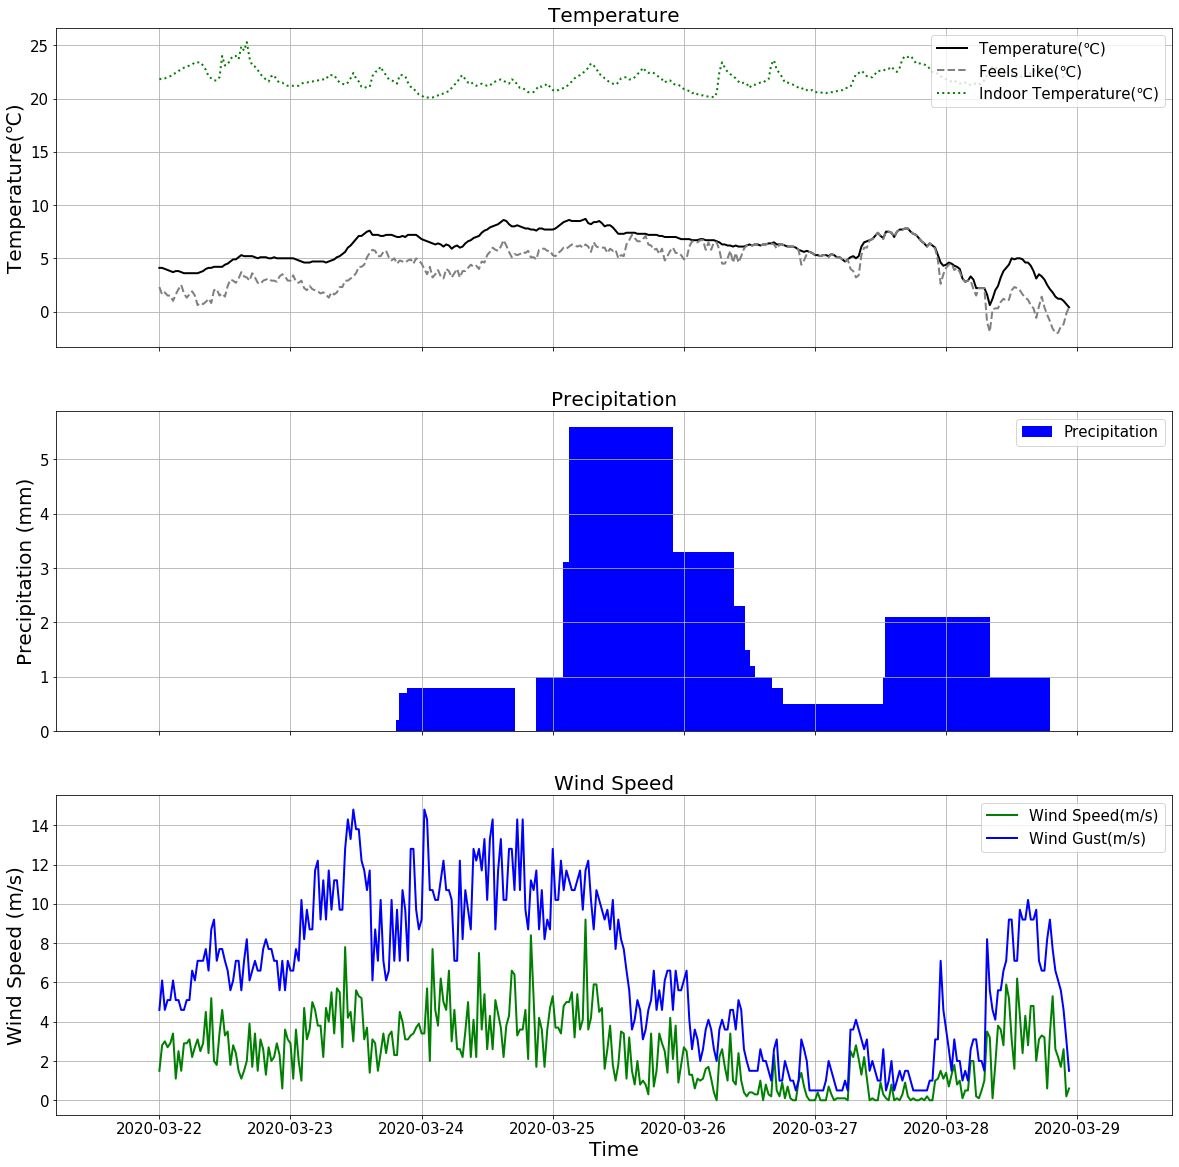

In [146]:
#Create figure with three subplots (3 rows, one column)

fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize = (20,20), sharex=True, sharey=False)

#Plot the data for each subplot
ax1.plot( 'Time', 'Temperature(℃)', data=weather_data, color='black', linewidth=2)
ax1.plot( 'Time', 'Feels Like(℃)', data=weather_data, color='grey', linewidth=2, linestyle = 'dashed')
ax1.plot( 'Time', 'Indoor Temperature(℃)', data=weather_data, color='green', linewidth=2, linestyle = 'dotted')

ax2.bar( 'Time', 'Precipitation (mm)', data=weather_data, color='blue', label = 'Precipitation')

ax3.plot('Time', 'Wind Speed(m/s)', data=weather_data, color='green', linewidth=2)
ax3.plot('Time', 'Wind Gust(m/s)', data=weather_data, color='blue', linewidth=2)

#Set the axis for the graph. Add a grid
ax1.set_ylabel('Temperature(℃)', fontsize=20) #add the y-label
ax1.tick_params(labelsize=15) #Set the label number font size
ax1.grid() #Add a grid
ax2.set_ylabel('Precipitation (mm)', fontsize=20) #add the y-label
ax2.tick_params(labelsize=15) #Set the label number font size
ax2.grid() #Add a grid
ax3.set_xlabel('Time' , fontsize=20) #add the x-label
ax3.set_ylabel('Wind Speed (m/s)', fontsize=20) #add the y-label
ax3.tick_params(labelsize=15) #Set the label number font size
ax3.grid() #Add a grid

#Set titles for each plot
ax1.set_title("Temperature", fontsize = 20)
ax2.set_title("Precipitation", fontsize = 20)
ax3.set_title("Wind Speed", fontsize = 20)

#Add legends
ax1.legend(fontsize = 15, loc = 'upper right')
ax2.legend(fontsize = 15, loc = 'upper right')
ax3.legend(fontsize = 15, loc = 'upper right')

#Save figure
plt.savefig("ClimateData_temperature_precipitation_wind.png", dpi=300)


,Depth (cm),Si,S,K,Ca,Ti,Mn,Fe,Rb,Sr,Zr,Mo inc,Mo coh
0,0.00,27,5,209,646,290,148,9896,121,174,380,25390,3941
1,0.05,34,21,225,609,261,99,9762,57,147,571,24739,3927
2,0.10,0,0,174,624,235,105,9581,139,239,397,25070,3780
3,0.15,51,10,190,629,281,135,9818,61,250,373,24890,4074
4,0.20,19,26,196,588,360,168,9456,62,283,452,24778,3950


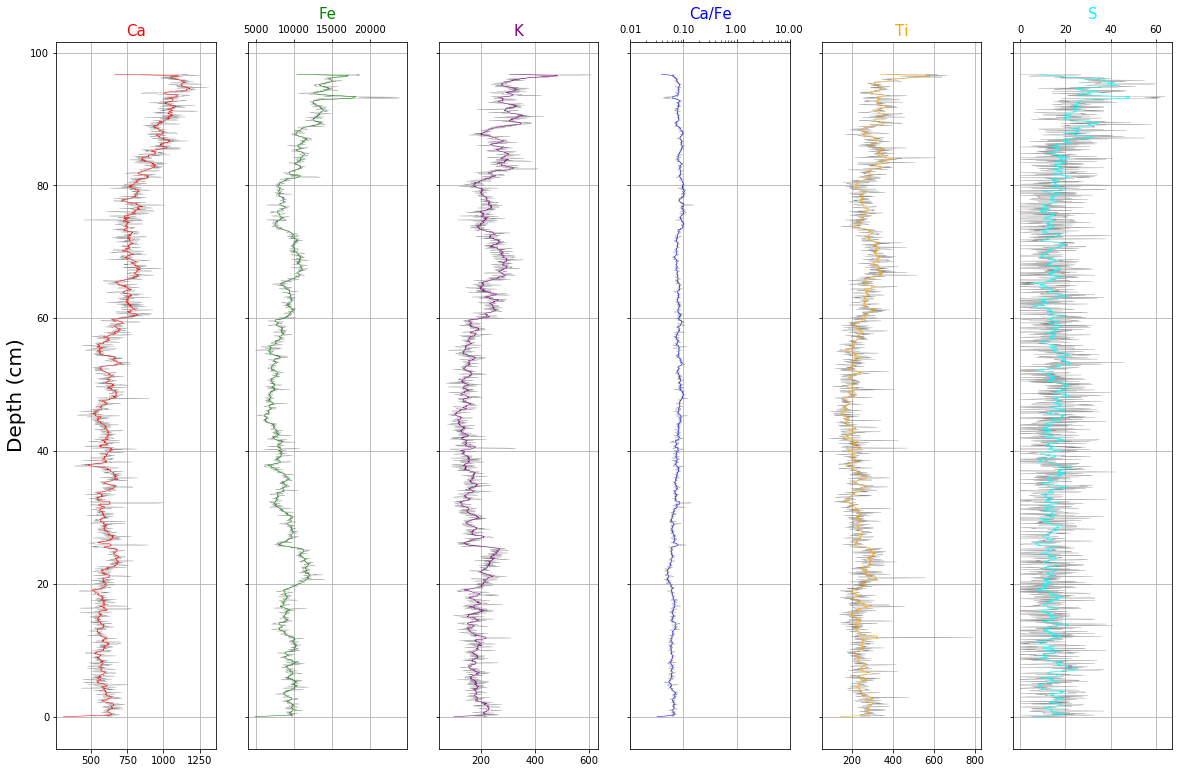

In [77]:

#Create figure with six subplots (6 rows, one column)

fig, ((ax1, ax2, ax3, ax4, ax5, ax6)) = plt.subplots(1, 6, figsize = (20,13), sharex=False, sharey=True)


#Compute Ratio between Ca and Fe
XRF['Ca/Fe'] = XRF['Ca']/XRF['Fe']

#Compute moving average of Ti. Once you have defined this, you can create a new dataset with a moving average, as seen below
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')


XRF['Ca_average'] = movingaverage(XRF['Ca'], 10)
XRF['Fe_average'] = movingaverage(XRF['Fe'], 10)
XRF['K_average'] = movingaverage(XRF['K'], 10)
XRF['Ca/Fe_average'] = movingaverage(XRF['Ca/Fe'], 10)
XRF['Ti_average'] = movingaverage(XRF['Ti'], 10)
XRF['S_average'] = movingaverage(XRF['S'], 10)



#Plot the data in each subplot. Note how instead of setting the thickness for each element we are plotting, we are defining our thickness as a variable. Then we can just change one value and update all 6 plots.
line_thickness = 0.3

ax1.plot( 'Ca', 'Depth (cm)', data=XRF, color='grey', linewidth=line_thickness)
ax2.plot( 'Fe', 'Depth (cm)', data=XRF, color='grey', linewidth=line_thickness)
ax3.plot( 'K', 'Depth (cm)', data=XRF, color='grey', linewidth=line_thickness)
ax4.plot( 'Ca/Fe', 'Depth (cm)', data=XRF, color='grey', linewidth=line_thickness)
ax5.plot( 'Ti', 'Depth (cm)', data=XRF, color='grey', linewidth=line_thickness)
ax6.plot( 'S', 'Depth (cm)', data=XRF, color='grey', linewidth=line_thickness)

#Plot moving average values in a thicker line. Note how instead of setting the thickness for each element we are plotting, we are defining our thickness as a variable. Then we can just change one value and update all 6 plots.
moving_average_line_thickness = 0.5

ax1.plot( 'Ca_average', 'Depth (cm)', data=XRF, color='red', linewidth=moving_average_line_thickness)
ax2.plot( 'Fe_average', 'Depth (cm)', data=XRF, color='green', linewidth=moving_average_line_thickness)
ax3.plot( 'K_average', 'Depth (cm)', data=XRF, color='purple', linewidth=moving_average_line_thickness)
ax4.plot( 'Ca/Fe_average', 'Depth (cm)', data=XRF, color='blue', linewidth=moving_average_line_thickness)
ax5.plot( 'Ti_average', 'Depth (cm)', data=XRF, color='orange', linewidth=moving_average_line_thickness)
ax6.plot( 'S_average', 'Depth (cm)', data=XRF, color='cyan', linewidth=moving_average_line_thickness)

#Set some of the plots to have the x-axis at the top of the figure
ax2.xaxis.tick_top()
ax4.xaxis.tick_top()
ax6.xaxis.tick_top()
#Change one of the plots to have a logarthmic scale
ax4.set_xscale('log')
ax4.set_xticks([0.01, 0.1, 1, 10]) #Here you define the intervals you want to plot on a logarithmic scale axix
ax4.get_xaxis().set_major_formatter(mtick.ScalarFormatter()) #If you want to plot your logarthmic scale axis in the scientific style (1x10^^2) for example, remove this line

#Add titles to the subplots
ax1.set_title("Ca", fontsize = 15, color='red')
ax2.set_title("Fe", fontsize = 15, color='green')
ax3.set_title("K", fontsize = 15, color='purple')
ax4.set_title("Ca/Fe", fontsize = 15, color='blue')
ax5.set_title("Ti", fontsize = 15, color='orange')
ax6.set_title("S", fontsize = 15, color='cyan')

#Add grids
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()

#Add Y label. (Notice that it is shared between all the plots)
ax1.set_ylabel('Depth (cm)' , fontsize=20)

#Save figure
plt.savefig("XRF_data.png", dpi=300)
